In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
#from autils import *
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

# Handwritten Digit Recognition

In this notebook, I am going to explore a neural network to recognize two handwritten digits, zero and one.

In [18]:
def load_data():
    X = np.load("data/X.npy")
    y = np.load("data/y.npy")
    X = X[0:1000]
    y = y[0:1000]
    return X, y

In [19]:
X, y = load_data()

In [27]:
print(X.shape)
print(y.shape)

(1000, 400)
(1000, 1)


# Escribir aqui la descripcion de los datos. (PENDIENTE)

Exploring the data

In [28]:
print("The first element of X is: ", X[0])

The first element of X is:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+

In [33]:
print("The first element of y is: ", y[0,0])
print("The last element of y is: ", y[-1,0])

The first element of y is:  0
The last element of y is:  1


Exploring the shape of the data:

In [37]:
print("The shape of X is: " + str(X.shape))
print("The shape of y is: " + str(y.shape))

The shape of X is: (1000, 400)
The shape of y is: (1000, 1)


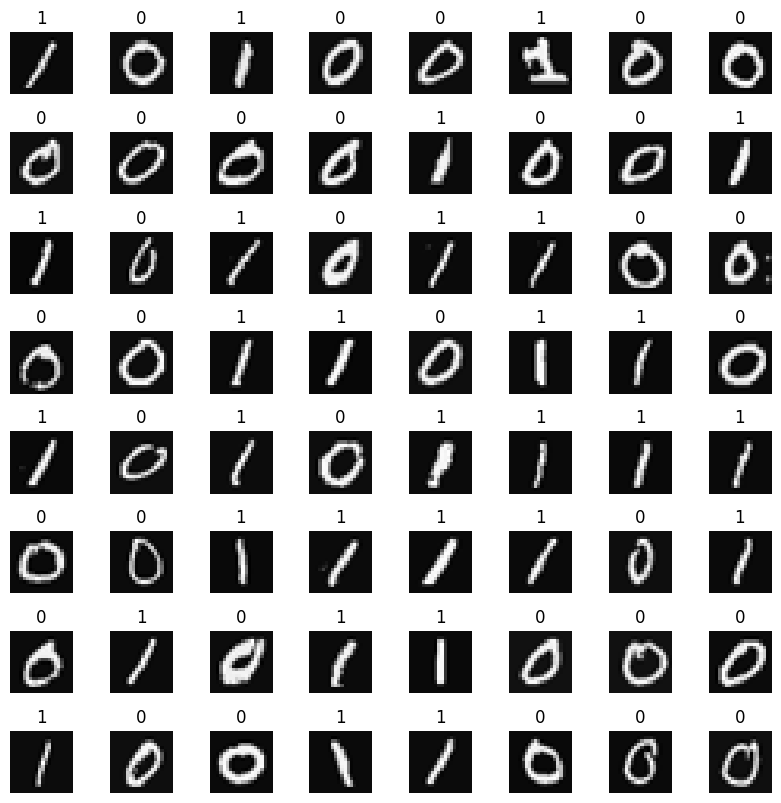

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) #Explain what this does

m, n = X.shape

fig, axes = plt.subplots(8,8,figsize=(8,8))
fig.tight_layout(pad=0.1) # Explain this

for i,ax in enumerate(axes.flat): # Why sometimes is used range() and here enumerate? What is the difference? When I should use one instead the other one?
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray') # Explain imshow

    #Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

# Model representation

This model has 3 dense layers with sigmoid activations.

The shaper for `W` and `b` are:

- layer 1: `W1` is (400,25), `b1` is (25,)
- layer 2: `W2` is (25,15), `b2` is (15,)
- layer 3: `W3` is (15,1), `b3` is (1,)

A `Sequential` model is appropiate for **a plain of layers** where each layer has **exactly one input tensor and one output tensor**

In [41]:
model = Sequential (
    [
        tf.keras.Input((400,)),
        Dense(25, activation='sigmoid', name='layer1'),
        Dense(15, activation='sigmoid', name='layer2'),
        Dense(1, activation='sigmoid', name='layer3')
    ], name= "my_model"
)

2025-03-19 21:25:56.358917: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-03-19 21:25:56.360297: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [42]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 25)             │        10,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer3 (Dense)                  │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,431 (40.75 KB)

 Trainable params: 10,431 (40.75 KB)

 Non-trainable params: 0 (0.00 B)

The number of parameters shown un the summary correspond to the number of elements in the weight and bias arrays shown belos:

In [44]:
L1_num_params = 400 * 25 + 25 # W1 parameters + b1 parameters
L2_num_params = 25 * 15  + 15 # W2 parameters + b2 parameters
L3_num_params = 15 * 1   + 1  # W3 parameters + b3 parameters
print("L1 parameters= ", L1_num_params, " , L2 parameters= ", L2_num_params, " , L3 parameters= ", L3_num_params)

L1 parameters=  10025  , L2 parameters=  390  , L3 parameters=  16


To examinate in detail this model, we can extract the layers with `model.layers` and then extract the weights with `layerx.get_weights()`: 

In [45]:
[layer1, layer2, layer3] = model.layers

In [46]:
W1, b1 = layer1.get_weights()
W2, b2 = layer2.get_weights()
W3, b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


`xx.get_weights`returns a NumPy array. Also, we can access the weights directly in their tensor form.

In [47]:
print(model.layers[2].weights)

[<KerasVariable shape=(15, 1), dtype=float32, path=my_model/layer3/kernel>, <KerasVariable shape=(1,), dtype=float32, path=my_model/layer3/bias>]


To define a loss function and run gradient descent to fit the weights of the model to the training data, we run the following code:

In [49]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(0.001)
)

model.fit(X,y, epochs=20)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 750us/step - loss: 0.6726 
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - loss: 0.4934
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - loss: 0.3364
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - loss: 0.2251
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - loss: 0.1616
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - loss: 0.1257
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - loss: 0.0950
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - loss: 0.0778
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - loss: 0.0618
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - loss: 0.0548
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - loss: 0.0505
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - loss: 0.0401
Epoch 13/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - loss: 0.0471
Epoch 14/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - loss: 0.0376
Epoch 15/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - l

To run the model on an example to make a prediction, use `keras.predict`.

In [53]:
prediction = model.predict(X[0].reshape(1,400)) # a zero
print(f"prediction a zero: {prediction}")
prediction = model.predict(X[500].reshape(1,400)) # a one
print(f"prediction a one: {prediction}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
prediction a zero: [[0.01257814]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
prediction a one: [[0.98194945]]


Since this is a probability, we are going to change it to binary output.

In [54]:
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print(f"Prediction after threshold: {yhat}")

Prediction after threshold: 1


Let's compare the predictions vs labels:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━

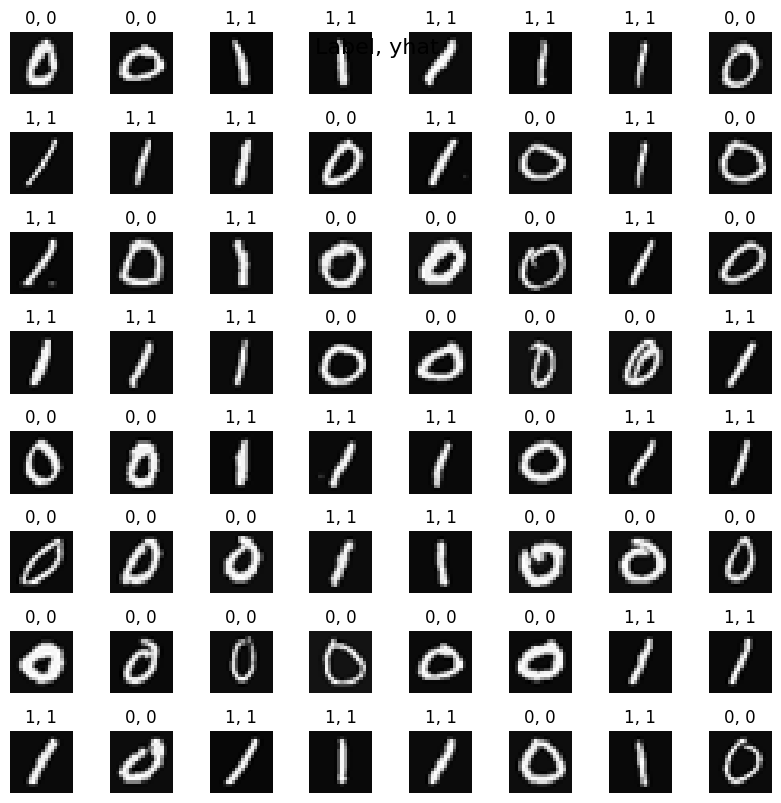

In [60]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m,n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    X_random_index_reshaped = X[random_index].reshape((20,20)).T
    ax.imshow(X_random_index_reshaped, cmap='gray')

    prediction = model.predict(X[random_index].reshape(1,400))

    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
    
    ax.set_title(f"{y[random_index,0]}, {yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=16)
plt.show()